# GNN Training Results Analysis

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
with open('outputs/training_metrics.json', 'r') as f:
    metrics = json.load(f)

with open('outputs/motif_metrics.json', 'r') as f:
    motif_metrics = json.load(f)

print("Loaded training metrics")
print(f"Number of epochs: {len(metrics['train_loss'])}")

Loaded training metrics
Number of epochs: 20


## Training Progress Over Epochs


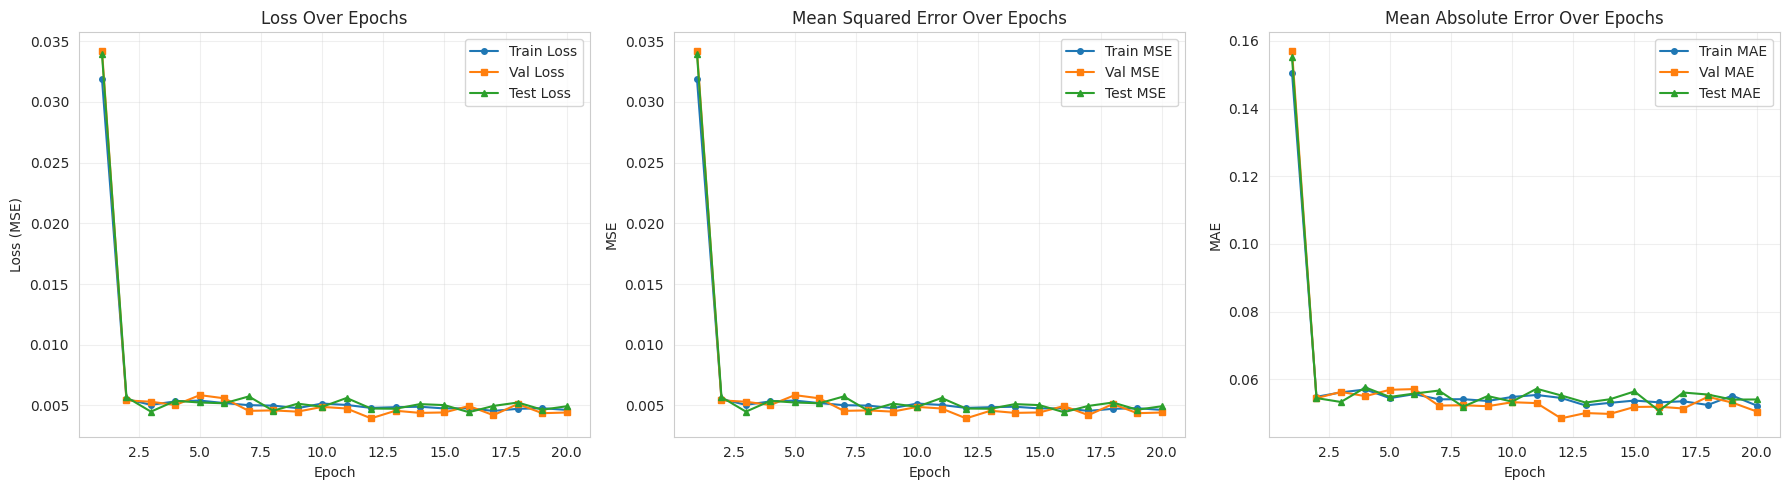

In [3]:
epochs = np.arange(1, len(metrics['train_loss']) + 1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(epochs, metrics['train_loss'], label='Train Loss', marker='o', markersize=4)
axes[0].plot(epochs, metrics['val_loss'], label='Val Loss', marker='s', markersize=4)
axes[0].plot(epochs, metrics['test_loss'], label='Test Loss', marker='^', markersize=4)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Loss Over Epochs')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(epochs, metrics['train_mse'], label='Train MSE', marker='o', markersize=4)
axes[1].plot(epochs, metrics['val_mse'], label='Val MSE', marker='s', markersize=4)
axes[1].plot(epochs, metrics['test_mse'], label='Test MSE', marker='^', markersize=4)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MSE')
axes[1].set_title('Mean Squared Error Over Epochs')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(epochs, metrics['train_mae'], label='Train MAE', marker='o', markersize=4)
axes[2].plot(epochs, metrics['val_mae'], label='Val MAE', marker='s', markersize=4)
axes[2].plot(epochs, metrics['test_mae'], label='Test MAE', marker='^', markersize=4)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('MAE')
axes[2].set_title('Mean Absolute Error Over Epochs')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/training_progress.png', dpi=150, bbox_inches='tight')
plt.show()


## Final Epoch Metrics


Final Epoch Metrics:
Split     Loss      MSE      MAE
Train 0.004629 0.004629 0.052256
  Val 0.004415 0.004415 0.050507
 Test 0.004929 0.004929 0.054063


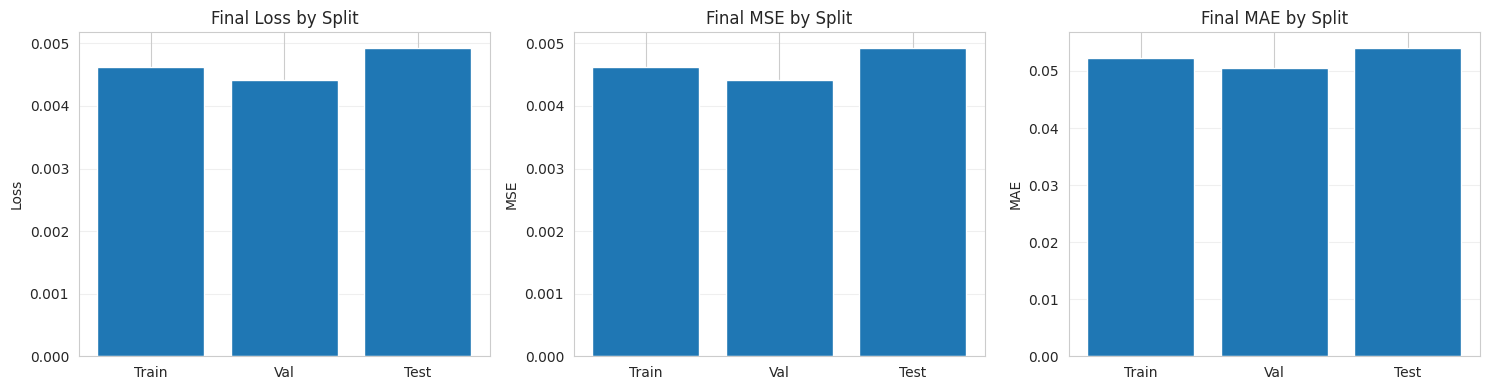

In [4]:
final_epoch = len(metrics['train_loss']) - 1

results_df = pd.DataFrame({
    'Split': ['Train', 'Val', 'Test'],
    'Loss': [metrics['train_loss'][final_epoch], metrics['val_loss'][final_epoch], metrics['test_loss'][final_epoch]],
    'MSE': [metrics['train_mse'][final_epoch], metrics['val_mse'][final_epoch], metrics['test_mse'][final_epoch]],
    'MAE': [metrics['train_mae'][final_epoch], metrics['val_mae'][final_epoch], metrics['test_mae'][final_epoch]]
})

print("Final Epoch Metrics:")
print(results_df.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

splits = ['Train', 'Val', 'Test']
x_pos = np.arange(len(splits))

axes[0].bar(x_pos, [metrics['train_loss'][final_epoch], metrics['val_loss'][final_epoch], metrics['test_loss'][final_epoch]])
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(splits)
axes[0].set_ylabel('Loss')
axes[0].set_title('Final Loss by Split')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos, [metrics['train_mse'][final_epoch], metrics['val_mse'][final_epoch], metrics['test_mse'][final_epoch]])
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(splits)
axes[1].set_ylabel('MSE')
axes[1].set_title('Final MSE by Split')
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(x_pos, [metrics['train_mae'][final_epoch], metrics['val_mae'][final_epoch], metrics['test_mae'][final_epoch]])
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(splits)
axes[2].set_ylabel('MAE')
axes[2].set_title('Final MAE by Split')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('outputs/final_metrics.png', dpi=150, bbox_inches='tight')
plt.show()



Performance by Motif Type:
              Motif  Mean MSE  Std MSE  Mean MAE  Std MAE
   feedforward_loop  0.004270 0.001241  0.052413 0.007958
      feedback_loop  0.002783 0.000550  0.044657 0.004540
single_input_module  0.008307 0.002064  0.067007 0.008804
            cascade  0.002774 0.000541  0.043351 0.004752


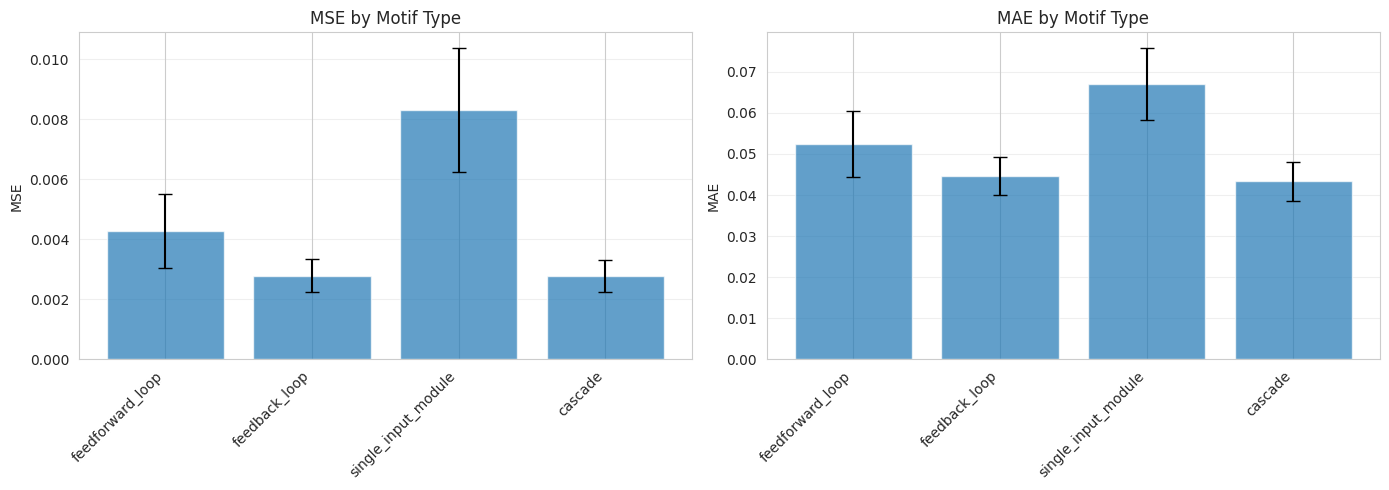

In [5]:
motif_data = []
for motif, mets in motif_metrics.items():
    if 'mean_mse' in mets:
        motif_data.append({
            'Motif': motif,
            'Mean MSE': mets['mean_mse'],
            'Std MSE': mets['std_mse'],
            'Mean MAE': mets['mean_mae'],
            'Std MAE': mets['std_mae']
        })

motif_df = pd.DataFrame(motif_data)
print("\nPerformance by Motif Type:")
print(motif_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

motifs = motif_df['Motif'].values
x_pos = np.arange(len(motifs))

axes[0].bar(x_pos, motif_df['Mean MSE'], yerr=motif_df['Std MSE'], capsize=5, alpha=0.7)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(motifs, rotation=45, ha='right')
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE by Motif Type')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos, motif_df['Mean MAE'], yerr=motif_df['Std MAE'], capsize=5, alpha=0.7)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(motifs, rotation=45, ha='right')
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE by Motif Type')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('outputs/motif_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## Detailed Motif Comparison


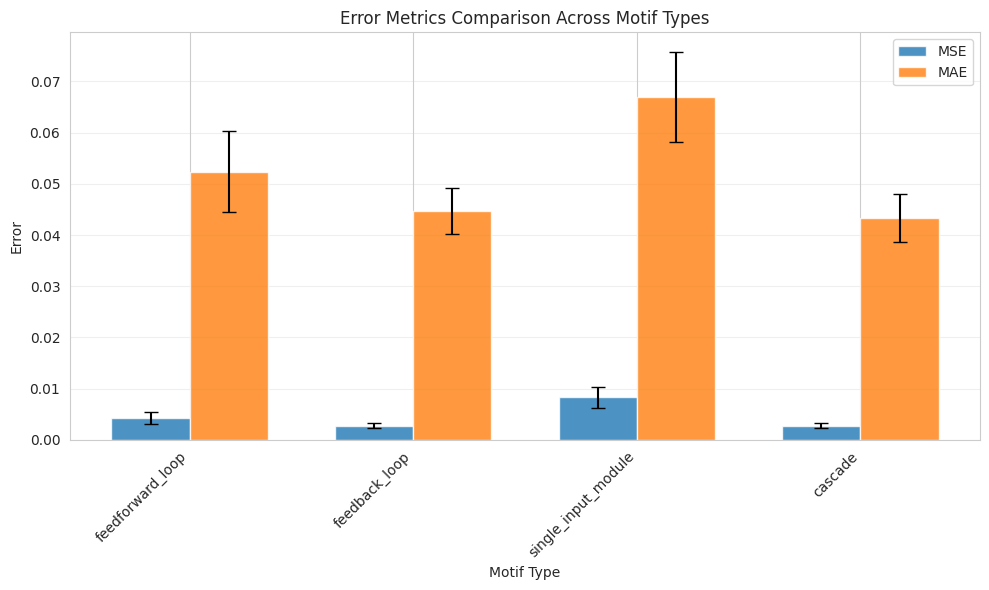


Summary Statistics:
Best performing motif (lowest MSE): cascade
Worst performing motif (highest MSE): single_input_module

MSE range: 0.0028 - 0.0083
MAE range: 0.0434 - 0.0670


In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(motifs))
width = 0.35

bars1 = ax.bar(x - width/2, motif_df['Mean MSE'], width, yerr=motif_df['Std MSE'], 
                label='MSE', capsize=5, alpha=0.8)
bars2 = ax.bar(x + width/2, motif_df['Mean MAE'], width, yerr=motif_df['Std MAE'], 
                label='MAE', capsize=5, alpha=0.8)

ax.set_xlabel('Motif Type')
ax.set_ylabel('Error')
ax.set_title('Error Metrics Comparison Across Motif Types')
ax.set_xticks(x)
ax.set_xticklabels(motifs, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('outputs/motif_detailed_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSummary Statistics:")
print(f"Best performing motif (lowest MSE): {motif_df.loc[motif_df['Mean MSE'].idxmin(), 'Motif']}")
print(f"Worst performing motif (highest MSE): {motif_df.loc[motif_df['Mean MSE'].idxmax(), 'Motif']}")
print(f"\nMSE range: {motif_df['Mean MSE'].min():.4f} - {motif_df['Mean MSE'].max():.4f}")
print(f"MAE range: {motif_df['Mean MAE'].min():.4f} - {motif_df['Mean MAE'].max():.4f}")


## GAT Logic & Usage

- `GATModel` is a two-layer attention network: a 4-head edge-aware layer (16 dims per head, concatenated to 64 dims) followed by a single-head output layer.
- Select architecture via CLI:
  ```bash
  python train_gnn.py --model_type GCN --epochs 20
  python train_gnn.py --model_type GAT --epochs 20
  ```
- Each run saves `checkpoints/{gnn,gat}_model.pt`, plus `outputs/training_metrics.json` and `outputs/motif_metrics.json`. Load these JSON files in `analysis_notebook.ipynb` to compare GCN vs GAT loss/MSE/MAE and motif metrics.

## SAE Updates & Usage

- `sparse_autoencoder.py` now supports two sparsity modes:
  - `--sparsity_type l1`: original L1 penalty.
  - `--sparsity_type topk`: penalizes all activations outside the largest K entries (`K = latent_dim × topk_ratio`).
- Example commands:
  ```bash
  python sparse_autoencoder.py --sparsity_type l1
  python sparse_autoencoder.py --sparsity_type topk --topk_ratio 0.05
  ```
- Checkpoints store `sparsity_type` and `topk_ratio`, and latents remain in `outputs/sae_latents/`. This lets you run and compare L1 vs TopK SAE runs for interpretability analysis.

